# Hate Speech Detection

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


# Data Cleaning

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [7]:
# check information about datset 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


- 0:- No Hate Speech 
- 1:- Hate Speech

In [9]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

- No Null values in train dataset .

In [11]:
train.duplicated().sum()

0

- NO duplicate Records in train dataset .

In [12]:
import re 

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [13]:
#  check dataset balance
 

train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x11a2b33c940>,
 [Text(-1.073398425069864, 0.24044920681411253, 'No Hate Speech'),
  Text(1.0733984363261024, -0.2404491565647056, 'Hate Speech')],
 [Text(-0.5854900500381076, 0.13115411280769773, '92.99'),
  Text(0.585490056177874, -0.13115408539893034, '7.01')])

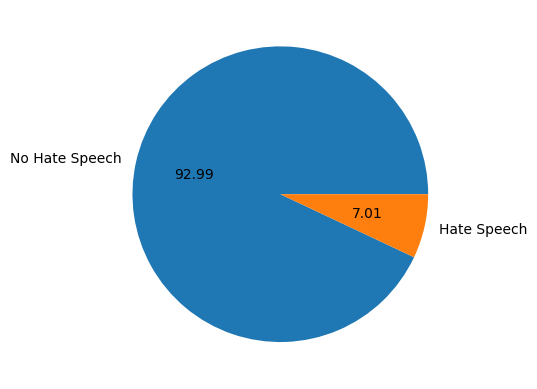

In [22]:
plt.pie(train['label'].value_counts() , labels=['No Hate Speech' , 'Hate Speech'] ,autopct='%.2f')

In [23]:
# Balace the dataset  
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

label
1    29720
0    29720
Name: count, dtype: int64

# Pipeline

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

# Training the model 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'],random_state = 0)

0.9691117092866757
[[7130  360]
 [  99 7271]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7490
           1       0.95      0.99      0.97      7370

    accuracy                           0.97     14860
   macro avg       0.97      0.97      0.97     14860
weighted avg       0.97      0.97      0.97     14860



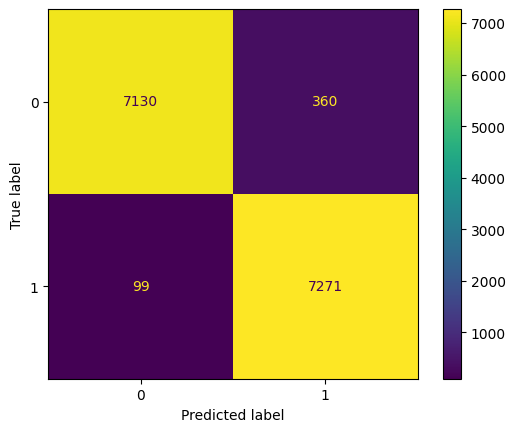

In [29]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import f1_score , accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict))
cm.plot()
